## DTSA 5511 Introduction to Deep Learning - Final Project

Project Title: BBC News Category Prediction: LR vs. ANN Classifiers <br>
Date: 2023 Dec 30 <br>
Author: Tsai-Yun Li <br>
Course Lecturer: Geena Kim <br>
Orginzation: University of Colorado Boulder <br>
Kaggle Competition Name: BBC News Classification - News Articles Categorization <br>
GitHub Repository Link: https://github.com/TsaiYunLi/ML3_Final-Project_TsaiYunLi

## Table of Contents

<br> 1. Problem Description<br> 2. Data Description<br> 3. Exploratory Data Analysis (EDA)  <br> 3.1 Basic EDA: Inspecting Features of the Dataframe  <br> 3.2 Basic EDA: Inspecting the Raw News Article Texts  <br> 3.3 Basic EDA: Basic Transformations of the News Article Texts  <br> 3.4 More EDA: NLP Transformations of the News Article Texts<br> 4. Data Splitting<br> 5. None-Deep Learning Hybrid Model: TFIDF_LR<br> 6. Deep Learning Hybrid Model: TFIDF_ANN<br> 7. Model Evaluation and Comparison  <br> 7.1 Evaluation of the None-Deep Learning Hybrid Model: TFIDF_LR  <br> 7.2 Evaluation of the Deep Learning Hybrid Model: TFIDF_ANN<br> 8. Discussion and Conclusion<br> 9. Refernces

### 1. Problem Description
In this project, my goal is to solve the Kaggle competition task, a multi-class classification problem, of predicting some BBC news article categories by training and comparing two models on the provided labelled news articles:
1. a none-deep learning hybrid model, TFIDF_LR = a term frequency–inverse document frequency (TF-IDF) vectorizer + a logistic regression (LR) classifier
2. and a deep learning hybrid model, TFIDF_ANN = an TF-IDF vectorizer + an artificial neural network (ANN) classifier

A vectorizer is necessary to preprocess the news article texts from strings to integers since machine learning models require numerical input. Among all the vectorizers, TF-IDF is chosen for its widespread use and availability as TfidfVectorizer in the sklearn library, and because that it is particularly suited to news article datasets where word frequency plays a crucial role in understanding context and facilitating categorization.

The choice to use both an LR classifier and an ANN classifier here stems from their ability to effectively handle vectorized text data. LR is simpler than ANN, faster to train, and can handle linearly speparable features well. However, ANN can handle complexer, non-linearly seperable features. Therefore, it is worth comparing both classifiers to see which performs better at this news category multi-class classification prediction task.

### 2. Data Description

As mentioned above, the datasets used in this project are from Kaggle (see section 9 for reference), including a training dataset 'BBC News Train.csv,' named as BBCtrain_data here, with 1490 rows and 3 columns, and a test dataset 'BBC News Test.csv,' named as BBCtest_data here, with 735 rows and 2 columns. Each row is an instance of BBC news article. The training set has columns 'ArticleID,' 'Text,' and 'Category'. While, the test set only has columns "ArticleID," and "Text." <br>

Column name and value:
1. ArticleId: a unique id for each BBC news article
2. Text: the raw text of each BBC news article, header included
3. Category: the cateogry of each BBC news article based on its content's topic, which could be 'tech', 'business', 'sport', 'entertainment', or 'politics'

In this section, I will inspect the datasets' basic features introduced above.

In [1]:
#importing and loading the datasets downloaded from Kaggle
import pandas as pd

BBCtrain_data = pd.read_csv('https://raw.githubusercontent.com/TsaiYunLi/ML3_Final-Project_TsaiYunLi/main/BBC%20News%20Train.csv')
BBCtest_data = pd.read_csv('https://raw.githubusercontent.com/TsaiYunLi/ML3_Final-Project_TsaiYunLi/main/BBC%20News%20Test.csv')

In [2]:
print('BBCtrain_data shape =', BBCtrain_data.shape)
print('BBCtrain_data head:')
BBCtrain_data.head()

BBCtrain_data shape = (1490, 3)
BBCtrain_data head:


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
unique_categories = BBCtrain_data['Category'].value_counts()
print("There are these unique categories in BBCtrain_data:", unique_categories)

There are these unique categories in BBCtrain_data: sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64


In [4]:
print('BBCtest_data shape =', BBCtest_data.shape)
print('BBCtest_data head:')
BBCtest_data.head()

BBCtest_data shape = (735, 2)
BBCtest_data head:


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


### 3.  Exploratory Data Analysis (EDA): Data Inspection, Visualization, Cleaning, and Transformation

In this section, I will perform an exploratory data analysis on the datasets BBCtrain_data and BBCtest_data, including further inspection on the datasets, visualizations of their features. Most importantly, I will prepare the datasets for model-training in later sections by doing some data cleaning and data transformation. <br>

There are four subsections in this section, from basic to more advanced EDA: <br>
3.1 Basic EDA: Inspecting Features of the Dataframe <br>
3.2 Basic EDA: Inspecting the Raw News Article Texts <br>
3.3 Basic EDA: Basic Transformations of the News Article Texts <br>
3.4 More EDA: NLP Transformations of the News Article Texts <br>

A short summary will be provided at the end of each subsection.

##### 3.1 Basic EDA: Inpecting Features of the Dataframe

In [5]:
# checking for null values and data type in BBCtrain_data
print("checking for null values and data type in BBCtrain_data:")
BBCtrain_data.info()

checking for null values and data type in BBCtrain_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [6]:
# checking for null values and data type in BBCtest_data
print("checking for null values and data type in BBCtest_data:")
BBCtest_data.info()

checking for null values and data type in BBCtest_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [7]:
# checking for duplicated rows in BBCtrain_data
train_duplicates = BBCtrain_data.duplicated().sum()
print("number of duplicated rows in BBCtrain_data:", train_duplicates)

number of duplicated rows in BBCtrain_data: 0


In [8]:
# checking for duplicated rows in BBCtest_data
test_duplicates = BBCtest_data.duplicated().sum()
print("number of duplicated rows in BBCtest_data:", test_duplicates)

number of duplicated rows in BBCtest_data: 0


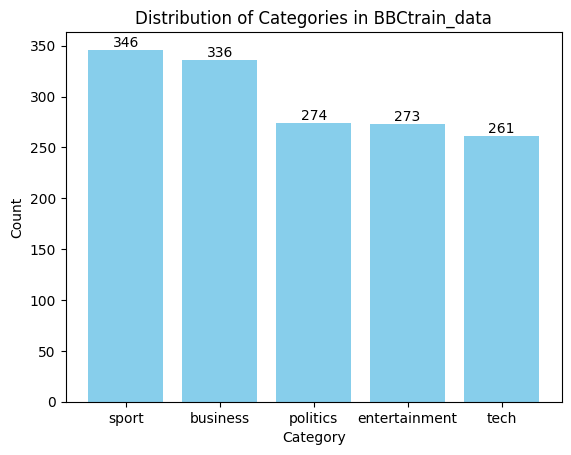

In [9]:
# visualizing the distribution of news article categories in BBCtrain_data
import matplotlib.pyplot as plt
train_category_counts = BBCtrain_data['Category'].value_counts()
hitogram_bars = plt.bar(train_category_counts.index, train_category_counts.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories in BBCtrain_data')

for hitogram_bar in hitogram_bars:
    yval = hitogram_bar.get_height()
    plt.text(hitogram_bar.get_x() + hitogram_bar.get_width()/2, yval + 0.05, round(yval, 2), va='bottom', ha='center')

plt.show()

In [10]:
# checking if BBCtrain_data has a rather balanced mix of categories
train_category_mean = train_category_counts.mean()
train_category_std = round(train_category_counts.std(), 0)

print("Mean count of articles per category in BBCtrain_data:", train_category_mean)
print("Standard deviation of article counts per category in BBCtrain_data:", train_category_std)

Mean count of articles per category in BBCtrain_data: 298.0
Standard deviation of article counts per category in BBCtrain_data: 40.0


##### Summary for Section 3.1:
1. There is neither null nor duplicated data in BBCtrain_data and BBCtest_data.
2. Due to the purpose of this project, there is no need to do statistical analysis on column 'ArticleId' and 'Text' in BBCtrain_data or BBCtest_data.
3. The distribution of 'Category' in BBCtrain_data is pretty balanced, with an average of 298 +- standard deviation 40 articles per category. The number of articles per category in BBCtrain_data is: 346 'sport,' 336 'business,' 274 'politics,' 273 'entertainment,' and 261' tech.'

##### 3.2 Basic EDA: Inspecting the Raw News Article Texts

In [11]:
# inspecting the raw text from a random row in BBCtrain_data
train_rand_row = BBCtrain_data.sample(n=1, random_state=20231228)
print(train_rand_row['Text'].values[0])

big war games battle it out the arrival of new titles in the popular medal of honor and call of duty franchises leaves fans of wartime battle titles spoilt for choice.  the acclaimed pc title call of duty has been updated for console formats  building on many of the original s elements. for its part  the long-running medal of honor series has added pacific assault to its pc catalogue  adapting the console game rising sun. call of duty: finest hour casts you as a succession of allied soldiers fighting on world war 2 battlefronts including russia and north africa. it is a traditional first-person-viewed game that lets you control just one character  in the midst of a unit where cohorts constantly bark orders at you. on a near-identical note  medal of honor: pacific assault does all it can to make you feel part of a tight-knit team and plum in the middle of all-out action. its arenas are the war s pacific battles  including guadalcanal and pearl harbour. you play one character throughout 

In [12]:
# inspecting the raw text from a random row in BBCtest_data
test_rand_row = BBCtest_data.sample(n=1, random_state=20231228)
print(test_rand_row['Text'].values[0])

howl helps boost japan s cinemas japan s box office received a 3.8% boost last year  with ticket sales worth 211bn yen (£1.08bn).  the surge was led by animated movie howl s moving castle  which took 20bn yen (£102m) to become the biggest film in japan in 2004. it is expected to match the 30.7bn yen (£157m) record of hayao miyazaki s previous film spirited away. japan motion picture producers figures showed that 170 million cinema admissions were made in japan in 2004. the last samurai  starring tom cruise  was the biggest foreign movie hit in japan last year  taking 13.8bn yen (£70.7m).  it was followed by harry potter and the prisoner of azkaban  finding nemo and the lord of the rings: the return of the king. the second highest-grossing japanese film was romantic drama crying out love in the centre of the world  followed by be with you and pocket monsters advanced generation. japanese films accounted for 37.5% of japan s box office total last year  with foreign films taking the remai

In [13]:
# computing average, max, min word count for the raw texts in BBCtrain_data
BBCtrain_raw_avg = BBCtrain_data['Text'].apply(lambda x: len(str(x).split())).mean()
BBCtrain_raw_max = BBCtrain_data['Text'].apply(lambda x: len(str(x).split())).max()
BBCtrain_raw_min = BBCtrain_data['Text'].apply(lambda x: len(str(x).split())).min()
print("raw text average word count in BBCtrain_data:", BBCtrain_raw_avg)
print("raw text max word count in BBCtrain_data:", BBCtrain_raw_max)
print("raw text min word count in BBCtrain_data:", BBCtrain_raw_min, "\n")

# computing average, max, min word count for the raw texts in BBCtest_data
BBCtest_raw_avg = BBCtest_data['Text'].apply(lambda x: len(str(x).split())).mean()
BBCtest_raw_max = BBCtest_data['Text'].apply(lambda x: len(str(x).split())).max()
BBCtest_raw_min = BBCtest_data['Text'].apply(lambda x: len(str(x).split())).min()
print("raw text average word count in BBCtest_data:", BBCtest_raw_avg)
print("raw text max word count in BBCtest_data:", BBCtest_raw_max)
print("raw text min word count in BBCtest_data:", BBCtest_raw_min)

raw text average word count in BBCtrain_data: 385.01275167785235
raw text max word count in BBCtrain_data: 3345
raw text min word count in BBCtrain_data: 90 

raw text average word count in BBCtest_data: 401.0040816326531
raw text max word count in BBCtest_data: 4492
raw text min word count in BBCtest_data: 126


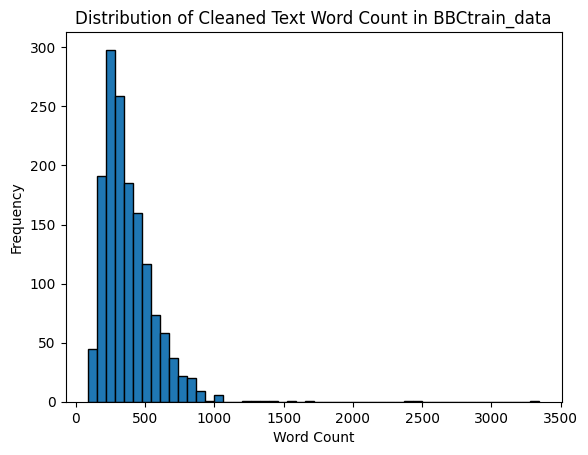

In [14]:
# visualizing the word count distribution for the raw texts in BBCtrain_data
BBCtrain_cleaned_word_count = BBCtrain_data['Text'].apply(lambda x: len(str(x).split()))
plt.hist(BBCtrain_cleaned_word_count, bins = 50, edgecolor='k')
plt.title('Distribution of Cleaned Text Word Count in BBCtrain_data')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

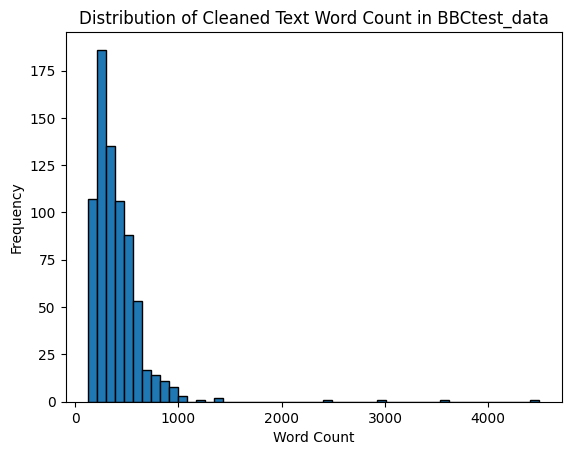

In [15]:
# visualizing the word count distribution for the raw texts in BBCtest_data
BBCtest_cleaned_word_count = BBCtest_data['Text'].apply(lambda x: len(str(x).split()))
plt.hist(BBCtest_cleaned_word_count, bins = 50, edgecolor='k')
plt.title('Distribution of Cleaned Text Word Count in BBCtest_data')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

##### Summary for Section 3.2:
1. The raw news articles texts are in natural English language paragraphs that consists of uncapitalized sentences, with punctuations, numbers, and extra leading/trailing spaces, which will be removed in the next section.
2. The raw news articles texts in BBCtrain_data have an average word count of about 385. The longest one has 3345 words, and the shortest one 90 words.  
3. The raw news articles texts in BBCtest_data have an average word count of about 401. The longest one has 4492 words, and the shortest one 126 words.
4. The statistical features in points 2 and 3 are visualized in histograms.
5. The outlier texts, the very long and very short ones, do not need to be removed, because they are legit, published news articles, which should not include inconsistant or irrelavent content.

##### 3.3 Basic EDA: Basic Transformations of the News Article Texts

In [16]:
# creating a new column "Train_Text_Cleaned" with the same values as in "Text" in BBCtrain_data
# prepared for doing some nlp preprocessing later
BBCtrain_data['Train_Text_Cleaned'] = BBCtrain_data['Text']

# creating a new column "Test_Text_Cleaned" with the same values as in "Text" in BBCtest_data
# prepared for doing some nlp preprocessing later
BBCtest_data['Test_Text_Cleaned'] = BBCtest_data['Text']

In [17]:
## removing punctuations
# removing punctuations from "Train_Text_Cleaned" in BBCtrain_data
BBCtrain_data['Train_Text_Cleaned'] = BBCtrain_data['Train_Text_Cleaned'].str.replace(r'[^\w\s]', '', regex=True)

# remove punctuations from "Test_Text_Cleaned" in BBCtest_data
BBCtest_data['Test_Text_Cleaned'] = BBCtest_data['Test_Text_Cleaned'].str.replace(r'[^\w\s]', '', regex=True)

In [18]:
## removing numbers
# removing numbers from "Train_Text_Cleaned" in BBCtrain_data
BBCtrain_data['Train_Text_Cleaned'] = BBCtrain_data['Train_Text_Cleaned'].str.replace(r'\d+', '', regex=True)

# removing numbers from "Test_Text_Cleaned" in BBCtest_data
BBCtest_data['Test_Text_Cleaned'] = BBCtest_data['Test_Text_Cleaned'].str.replace(r'\d+', '', regex=True)

In [19]:
## removing extra leading/trailing spaces
# removing extra leading/trailing spaces from "Train_Text_Cleaned" in BBCtrain_data
BBCtrain_data['Train_Text_Cleaned'] = BBCtrain_data['Train_Text_Cleaned'].str.replace(r'\s+', ' ', regex=True).str.strip()


# removing extra leading/trailing spaces from "Test_Text_Cleaned" in BBCtest_data
BBCtest_data['Test_Text_Cleaned'] = BBCtest_data['Test_Text_Cleaned'].str.replace(r'\s+', ' ', regex=True).str.strip()

##### Summary for Section 3.3:
1. The original news article texts are left untouched in column "Text."
2. Punctuations, numbers, and extra leading/trailing spaces are removed from the news article texts in both BBCtrain_data and BBCtest_data, and stored in new columns "Train_Text_Cleaned" and "Test_TExt_Cleaned," in the respective datasets.

##### 3.4 More EDA: NLP Transformations of the News Article Texts

In [20]:
# libraries for nlp preprocessing
%pip install nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
## nlp preprocessing: remove stop words
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stop_words(text):
    words = word_tokenize(text)
    no_stop_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(no_stop_words)

# remove stop words from "Train_Text_Cleaned" in BBCtrain_data
BBCtrain_data['Train_Text_Cleaned'] = BBCtrain_data['Train_Text_Cleaned'].apply(remove_stop_words)
print("BBCtrain_data['Train_Text_Cleaned'] without stop words:", "\n", BBCtrain_data['Train_Text_Cleaned'], "\n")

# remove stop words from "Test_Text_Cleaned" in BBCtest_data
BBCtest_data['Test_Text_Cleaned'] = BBCtest_data['Test_Text_Cleaned'].apply(remove_stop_words)
print("BBCtest_data['Test_Text_Cleaned'] without stop words:", "\n", BBCtest_data['Test_Text_Cleaned'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


BBCtrain_data['Train_Text_Cleaned'] without stop words: 
 0       worldcom exboss launches defence lawyers defen...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens maj...
3       lifestyle governs mobile choice faster better ...
4       enron bosses payout eighteen former enron dire...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hits reuters revenues media group ...
1488    apple ipod family expands market apple expande...
1489    santy worm makes unwelcome visit thousands web...
Name: Train_Text_Cleaned, Length: 1490, dtype: object 

BBCtest_data['Test_Text_Cleaned'] without stop words: 
 0      qpr keeper day heads preston queens park range...
1      software watching work software monitor every ...
2      arcy injury adds ireland woe gordon arcy ruled...
3      india reliance

In [22]:
## nlp preprocessing: tokenization and lemmatization
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def tokenization_then_lemmatization(text):
    tokenized_words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(tokenized_word) for tokenized_word in tokenized_words]
    return ' '.join(lemmatized_words)

# lemmatization of word tokens in "Train_Text_Cleaned" in BBCtrain_data
BBCtrain_data['Train_Text_Cleaned'] = BBCtrain_data['Train_Text_Cleaned'].apply(tokenization_then_lemmatization)


# lemmatization of word tokens in "Test_Text_Cleaned" in BBCtest_data
BBCtest_data['Test_Text_Cleaned'] = BBCtest_data['Test_Text_Cleaned'].apply(tokenization_then_lemmatization)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
# inspecting the cleaned text from a random row in BBCtrain_data
cleaned_train_rand_row = BBCtrain_data.sample(n=1, random_state=20231228)
print(cleaned_train_rand_row['Train_Text_Cleaned'].values[0])

big war game battle arrival new title popular medal honor call duty franchise leaf fan wartime battle title spoilt choice acclaimed pc title call duty updated console format building many original element part longrunning medal honor series added pacific assault pc catalogue adapting console game rising sun call duty finest hour cast succession allied soldier fighting world war battlefront including russia north africa traditional firstpersonviewed game let control one character midst unit cohort constantly bark order nearidentical note medal honor pacific assault make feel part tightknit team plum middle allout action arena war pacific battle including guadalcanal pearl harbour play one character throughout raw rather talkative u soldier game rely carefully stagemanaged structure keep thing ticking along work brilliant device make feel part story tedious winning moment early scene pacific assault come attack famous u base hawaii first ushered gunboat attacking incoming wave japanese p

In [24]:
# inspecting the cleaned text from a random row in BBCtest_data
cleaned_test_rand_row = BBCtest_data.sample(n=1, random_state=20231228)
print(cleaned_test_rand_row['Test_Text_Cleaned'].values[0])

howl help boost japan cinema japan box office received boost last year ticket sale worth bn yen bn surge led animated movie howl moving castle took bn yen become biggest film japan expected match bn yen record hayao miyazaki previous film spirited away japan motion picture producer figure showed million cinema admission made japan last samurai starring tom cruise biggest foreign movie hit japan last year taking bn yen followed harry potter prisoner azkaban finding nemo lord ring return king second highestgrossing japanese film romantic drama cry love centre world followed pocket monster advanced generation japanese film accounted japan box office total last year foreign film taking remaining represented gain proportion japanese film compared number japanese film released rose previous year sale movie dvd video amounted bn yen bn year


In [25]:
# computing average, max, min word count for the texts in BBCtrain_data after nlp preprocessing
BBCtrain_raw_avg = BBCtrain_data['Train_Text_Cleaned'].apply(lambda x: len(str(x).split())).mean()
BBCtrain_raw_max = BBCtrain_data['Train_Text_Cleaned'].apply(lambda x: len(str(x).split())).max()
BBCtrain_raw_min = BBCtrain_data['Train_Text_Cleaned'].apply(lambda x: len(str(x).split())).min()
print("text average word count in BBCtrain_data after nlp preprocessing:", BBCtrain_raw_avg)
print("text max word count in BBCtrain_data after nlp preprocessing:", BBCtrain_raw_max)
print("text min word count in BBCtrain_data after nlp preprocessing:", BBCtrain_raw_min, "/n")

# computing average, max, min word count for the texts in BBCtest_data after nlp preprocessing
BBCtest_raw_avg = BBCtest_data['Test_Text_Cleaned'].apply(lambda x: len(str(x).split())).mean()
BBCtest_raw_max = BBCtest_data['Test_Text_Cleaned'].apply(lambda x: len(str(x).split())).max()
BBCtest_raw_min = BBCtest_data['Test_Text_Cleaned'].apply(lambda x: len(str(x).split())).min()
print("text average word count in BBCtest_data after nlp preprocessing:", BBCtest_raw_avg)
print("text max word count in BBCtest_data after nlp preprocessing:", BBCtest_raw_max)
print("text min word count in BBCtest_data after nlp preprocessing:", BBCtest_raw_min)

text average word count in BBCtrain_data after nlp preprocessing: 212.85704697986577
text max word count in BBCtrain_data after nlp preprocessing: 1632
text min word count in BBCtrain_data after nlp preprocessing: 47 /n
text average word count in BBCtest_data after nlp preprocessing: 220.28843537414966
text max word count in BBCtest_data after nlp preprocessing: 2187
text min word count in BBCtest_data after nlp preprocessing: 69


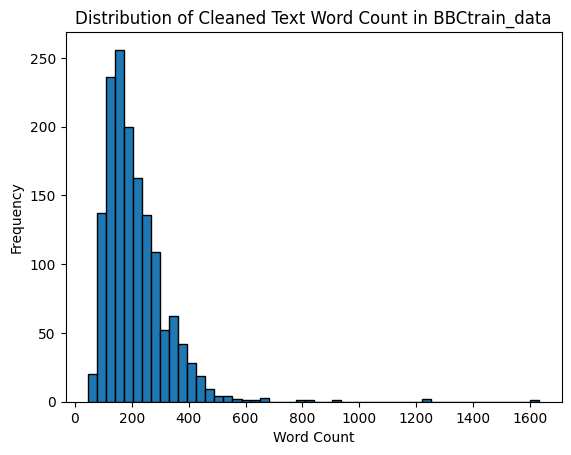

In [26]:
# visualizing the word count distribution for the cleaned text in BBCtrain_data
BBCtrain_cleaned_word_count = BBCtrain_data['Train_Text_Cleaned'].apply(lambda x: len(str(x).split()))
plt.hist(BBCtrain_cleaned_word_count, bins = 50, edgecolor='k')
plt.title('Distribution of Cleaned Text Word Count in BBCtrain_data')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

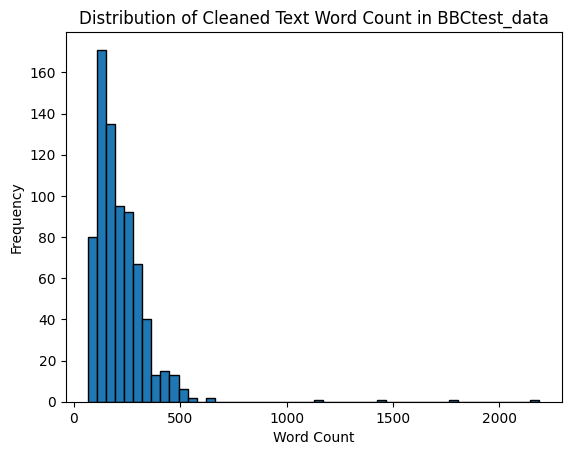

In [27]:
# visualizing the word count distribution for the cleaned text in BBCtest_data
BBCtest_cleaned_word_count = BBCtest_data['Test_Text_Cleaned'].apply(lambda x: len(str(x).split()))
plt.hist(BBCtest_cleaned_word_count, bins = 50, edgecolor='k')
plt.title('Distribution of Cleaned Text Word Count in BBCtest_data')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

##### Summary for Section 3.4:
In order to facilitate modeling in later sections, several nlp preprocessing steps are done for the news article texts in both BBCtrain_data and BBCtest_data:
1. Stop words are removed.
2. Paragraphs are tokenized into words.
3. Words are lemmatized.

After these nlp preprocessing steps, I inspected the cleaned texts and found that their lengths have been largely reduced to an average word count of about 213, a max word count of 1632, and a min word count of 47 in BBCtrain_data, and an average word count of about 220, a max word count of 2187, and a min word count of 69 in BBCtest_data. The concentrated texts will improve model performance and the accuracy of category prediction.

### 4. Data Splitting
The BBCtrain_data will be splitted into a training and a validation dataset with a traditional  80-20 split as X_train, y_train, and X_val, y_val. The training set will be used for model training in sections 5 and 6; while, the validation set will be used for model performance evaluation in section 7. 

Finally, after the models are optimized, the unlabelled dataset X_test will be used for predicting the categories of the unseen news articles in BBCtest_data.

In [28]:
from sklearn.model_selection import train_test_split

# splitting BBCtrain_data into a training and a validation set (with a 80-20 split)
X_train, X_val, y_train, y_val = train_test_split(
    BBCtrain_data['Train_Text_Cleaned'],
    BBCtrain_data['Category'],
    test_size=0.2,
    random_state=20231228
)

X_test = BBCtest_data['Test_Text_Cleaned']
#TFIDF_LR_y_pred to be predicted using the TFIDF_LR model
#TFIDF_ANN_y_pred to be predicted using the TFIDF_ANN model

#### 5. None-Deep Learning Hybrid Model: TFIDF_LR

In [29]:
## training the model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# defining the TFIDF_LR pipeline
TFIDF_LR_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=200))
])

# defining the TFIDF_LR hyperparameters and their possible values
TFIDF_LR_param_grid = {
    'tfidf__max_features': [3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1],
    'clf__penalty': ['l1', 'l2']
}

# doing grid search for TFIDF_LR with 5-fold cross-validation
TFIDF_LR_grid_search = GridSearchCV(TFIDF_LR_pipeline, TFIDF_LR_param_grid, cv=5, verbose=1, n_jobs=-1)
TFIDF_LR_grid_search.fit(X_train, y_train)
print("TFIDF_LR Best parameters: ", TFIDF_LR_grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

TFIDF_LR Best parameters:  {'clf__C': 1, 'clf__penalty': 'l2', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}


In [30]:
# best TFIDF vectorizer
TFIDF_vectorizer = TFIDF_LR_grid_search.best_estimator_.named_steps['tfidf']
print("best TFIDF vectorizer:", TFIDF_vectorizer, "\n")

# best LR classifier
LR_model = TFIDF_LR_grid_search.best_estimator_.named_steps['clf']
print("best LR model:", LR_model)

best TFIDF vectorizer: TfidfVectorizer(max_features=5000, ngram_range=(1, 2)) 

best LR model: LogisticRegression(C=1, max_iter=200)


##### Summary for the TFIDF_LR Model:
1. Best TFIDF vectorizer: <br>
TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

2. Best LR model: <br>
LogisticRegression(C=1, max_iter=200)

#### 6. Deep Learning Hybrid Model: TFIDF_ANN

In [31]:
!pip install tensorflow keras_tuner

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import numpy as np

In [33]:
# best TFIDF vectorizer derived from the TFIDF_LR model
# cannot tune TFIDF alone using GridsearchCV
TFIDF_vectorizer = TFIDF_LR_grid_search.best_estimator_.named_steps['tfidf']
print("best TFIDF vectorizer:", TFIDF_vectorizer, "\n")

best TFIDF vectorizer: TfidfVectorizer(max_features=5000, ngram_range=(1, 2)) 



In [34]:
# transforming the training and validation data with the best TF-IDF vectorizer
X_train_tfidf = TFIDF_vectorizer.transform(X_train).toarray()
X_val_tfidf = TFIDF_vectorizer.transform(X_val).toarray()

In [35]:
# transforming the lables for the training and validation data from strings to integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [36]:
# tuning an ANN with Keras Tuner
def build_model(hp):
    model = Sequential()
    ## input dense layer
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu',
                    input_dim=X_train_tfidf.shape[1]))
    # activation function 'relu' chosen for handling the non-linear, pattern-complex text data

    ## dropout layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)))

    ## output dense layer
    model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))  
    # units = the number of unique classes in y_train_encoded
    # activation function 'softmax' chosen for multi-class classification 
    
    ## optimizer
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # optimizer Adam chosen for its adaptive learning rate during model training

    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='keras_tuner_dir',
    project_name='tfidf_ann_tuning'
)

tuner.search(X_train_tfidf, y_train_encoded, epochs=10, validation_data=(X_val_tfidf, y_val_encoded))

Reloading Tuner from keras_tuner_dir/tfidf_ann_tuning/tuner0.json


In [38]:
# getting the optimal hyperparameters for the ANN model
best_ANN_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
1. The optimal number of units in the first densely-connected
layer is {best_ANN_hps.get('units')}.
2. The optimal dropout rate in the dropout layer is {best_ANN_hps.get('dropout')}.
3. The optimal learning rate for the optimizer is {best_ANN_hps.get('learning_rate')}.
""")

ANN_model = tuner.get_best_models(num_models=1)[0]
print(f"The best ANN model is {ANN_model}.")


1. The optimal number of units in the first densely-connected
layer is 448.
2. The optimal dropout rate in the dropout layer is 0.30000000000000004.
3. The optimal learning rate for the optimizer is 0.0004101920412600361.

The best ANN model is <keras.src.engine.sequential.Sequential object at 0x7fb433d26c20>.


##### Summary for the TFIDF_ANN Model:
1. Best TFIDF vectorizer: <br>
TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

2. Best ANN model: <br>
model = Sequential() <br>
model.add(Dense(units=32, activation='relu', input_dim=X_train_tfidf.shape[1])) <br>
model.add(Dropout(rate=0.1)) <br>
model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))  <br>
model.compile(optimizer=Adam(learning_rate=0.0022559447282506848)), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

3. Best val_accuracy: 0.9798657894134521

#### 7. Model Evaluation and Comparison
The models will be evaluated on the validation set X_train, y_train with quantitative metrics, namely precision, recall, F1-score (from the classification report), overall accuracy, confusion matrix, and each category's missclassification distribution.

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

##### 7.1 Evaluation of the None-Deep Learning Hybrid Model: TFIDF_LR

In [40]:
# predicting the validation set labels
TFIDF_LR_y_val = TFIDF_LR_grid_search.predict(X_val)

print("Classification Report - TFIDF_LR:")
print(classification_report(y_val, TFIDF_LR_y_val)) #true, predicted

Classification Report - TFIDF_LR:
               precision    recall  f1-score   support

     business       0.96      0.99      0.97        68
entertainment       1.00      0.96      0.98        49
     politics       0.98      0.94      0.96        67
        sport       0.98      1.00      0.99        56
         tech       0.97      1.00      0.98        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



In [41]:
# confusion matrix
LR_val_confusionMatrix = confusion_matrix(y_val, TFIDF_LR_y_val)
print("TFIDF_LR confusion matrix:", LR_val_confusionMatrix, "\n")

LR_val_acc = np.trace(LR_val_confusionMatrix) / np.sum(LR_val_confusionMatrix) #sum diagonal / sum total
print("TFIDF_LR overall accuracy:", LR_val_acc)

TFIDF_LR confusion matrix: [[67  0  0  1  0]
 [ 1 47  1  0  0]
 [ 2  0 63  0  2]
 [ 0  0  0 56  0]
 [ 0  0  0  0 58]] 

TFIDF_LR overall accuracy: 0.9765100671140939


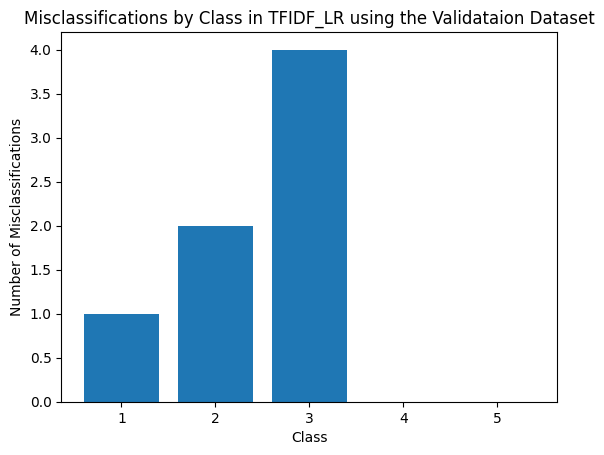

In [42]:
# visualizing the distribution of the misclassifications
TFIDF_LR_val_misclassifications = LR_val_confusionMatrix.sum(axis=1) - np.diag(LR_val_confusionMatrix)

plt.bar(range(1, len(TFIDF_LR_val_misclassifications) + 1), TFIDF_LR_val_misclassifications)
plt.xlabel('Class')
plt.ylabel('Number of Misclassifications')
plt.title('Misclassifications by Class in TFIDF_LR using the Validataion Dataset')
plt.show()

##### 7.2 Evaluation of the Deep Learning Hybrid Model: TFIDF_ANN

In [43]:
# predicting the validation set labels
TFIDF_ANN_y_val_prob = ANN_model.predict(X_val_tfidf)
TFIDF_ANN_y_val_integer = np.argmax(TFIDF_ANN_y_val_prob, axis=1)

# inverse transforming the TFIDF_ANN_y_val_integer to its original categorical labels
TFIDF_ANN_y_val = label_encoder.inverse_transform(TFIDF_ANN_y_val_integer)

print("Classification Report - TFIDF_ANN:")
print(classification_report(y_val, TFIDF_ANN_y_val)) # true, predicted

10/10 [==============================] - 0s 7ms/step
Classification Report - TFIDF_ANN:
               precision    recall  f1-score   support

     business       0.96      1.00      0.98        68
entertainment       1.00      0.96      0.98        49
     politics       0.98      0.94      0.96        67
        sport       1.00      1.00      1.00        56
         tech       0.97      1.00      0.98        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



In [44]:
# confusion matrix
ANN_val_confusionMatrix = confusion_matrix(y_val, TFIDF_ANN_y_val)
print("TFIDF_ANN confusion matrix:", ANN_val_confusionMatrix, "\n")

ANN_val_acc = np.trace(ANN_val_confusionMatrix) / np.sum(ANN_val_confusionMatrix) #sum diagonal / sum total
print("TFIDF_ANN overall accuracy:", ANN_val_acc)

TFIDF_ANN confusion matrix: [[68  0  0  0  0]
 [ 1 47  1  0  0]
 [ 2  0 63  0  2]
 [ 0  0  0 56  0]
 [ 0  0  0  0 58]] 

TFIDF_ANN overall accuracy: 0.9798657718120806


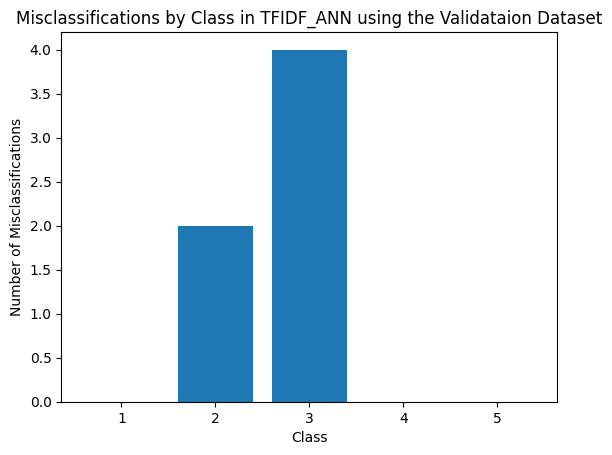

In [45]:
# visualizing the distribution of the misclassifications
TFIDF_ANN_val_misclassifications = ANN_val_confusionMatrix.sum(axis=1) - np.diag(ANN_val_confusionMatrix)

plt.bar(range(1, len(TFIDF_ANN_val_misclassifications) + 1), TFIDF_ANN_val_misclassifications)
plt.xlabel('Class')
plt.ylabel('Number of Misclassifications')
plt.title('Misclassifications by Class in TFIDF_ANN using the Validataion Dataset')
plt.show()

##### Summary for Evaluation Results of the TFIDF_LR vs. TFIDF_ANN Models:
Both models have very similar, very good results from their classification report and confusion matrix. Thier overall accuracy is also very close: TFIDF_LR model has an overall accuracy of around 0.9675; while, TFIDF_ANN model has an overall accuracy of about 0.9799, slightly higher than the one for the TFIDF_LR model. TFIDF_LR model misclassified 1, 2, and 4 instances for sport, business, and politics categories, respectively. TFIDF_LR model misclassified 2 and 4 instances for business and politics categories, respectively. Their total number of misclassifications is significantly small for a total number of 1490*20%=298 news articles in the validation dataset X_val, y_val.

### 8. Conclusion
Since both the TFIDF_LR (overall accuracy 0.9675) and TFIDF_ANN models perform well on the valdation dataset (overall accuracy 0.9799), both models are used to predict the news categories in the unlabelled, unseen BBCtest_data. The predicted categories of the two models only differ on totally 11 out of 735 instances, i.e., about 1.5 % of the entire test data. Even though there is no answer set for the categorization result of this test data, I inspected one raw news article text each, along with their predicted categories from the two models, which seem to be correct. I believe that the TFIDF_LR and the TFIDF_ANN models do indeed perform well on the test data.

In [47]:
## predicting the news article categories in BBCtest_data using the TFIDF_LR model
TFIDF_LR_y_pred = TFIDF_LR_grid_search.predict(X_test)

# adding the predictions to BBCtest_data
BBCtest_data['LR_PredictedCategory'] = TFIDF_LR_y_pred

In [48]:
## predicting the news article categories in BBCtest_data using the TFIDF_ANN model
# predicting the validation set labels
X_test_tfidf = TFIDF_vectorizer.transform(X_test).toarray()
TFIDF_ANN_y_pred_prob = ANN_model.predict(X_test_tfidf)
TFIDF_ANN_y_pred_integer = np.argmax(TFIDF_ANN_y_pred_prob, axis=1)

# inverse transforming the TFIDF_ANN_y_val_integer to its original categorical labels
TFIDF_ANN_y_pred = label_encoder.inverse_transform(TFIDF_ANN_y_pred_integer)

# adding the predictions to BBCtest_data
BBCtest_data['ANN_PredictedCategory'] = TFIDF_ANN_y_pred

23/23 [==============================] - 0s 7ms/step


In [49]:
# displaying BBCtest_data with the predicted categories and comparing them
#print(BBCtest_data[['ArticleId', 'Text', 'LR_PredictedCategory', 'ANN_PredictedCategory']])
print(BBCtest_data[['LR_PredictedCategory', 'ANN_PredictedCategory']])

    LR_PredictedCategory ANN_PredictedCategory
0                  sport                 sport
1                   tech                  tech
2                  sport                 sport
3               business              business
4                  sport                 sport
..                   ...                   ...
730             business              business
731        entertainment         entertainment
732                 tech                  tech
733             business              business
734             politics              politics

[735 rows x 2 columns]


In [50]:
# finding rows where the values in the two columns 'LR_PredictedCategory' and 'ANN_PredictedCategory' are different
mismatch_condition = BBCtest_data['LR_PredictedCategory'] != BBCtest_data['ANN_PredictedCategory']
mismatched_rows = BBCtest_data[mismatch_condition]
the_mismatched_rows = mismatched_rows[['LR_PredictedCategory', 'ANN_PredictedCategory']]
num_mismatched_rows = mismatch_condition.sum()
num_total_news = len(X_test)
print("The News Categories Predicted Differently by the Two Models", "\n", the_mismatched_rows, "\n")
print(f"totally {num_mismatched_rows} out of {num_total_news} instances, i.e., about {round(num_mismatched_rows/num_total_news*100,2)} %")

The News Categories Predicted Differently by the Two Models 
     LR_PredictedCategory ANN_PredictedCategory
64         entertainment              business
70                  tech              business
102             business              politics
120             business         entertainment
153        entertainment                  tech
183             business              politics
194                sport                  tech
332        entertainment              business
422                 tech              business
432             business                  tech
596                 tech              politics 

totally 11 out of 735 instances, i.e., about 1.5 %


In [51]:
# inspecting the content of a random raw news article in 'Text' in BBCtest_data
# and see if it does match its predicted categories in 'LR_PredictedCategory'
import random
random.seed(20231229)
random_index_1 = random.choice(BBCtest_data.index)

print("1. the content of a randomly selected news article in BBCtest_data :", "\n")
print(BBCtest_data.loc[random_index_1, 'Text'], "\n")


print("2. the predicted category using TFIDF_LR for the article:", "\n")
print(BBCtest_data.loc[random_index_1, 'LR_PredictedCategory'])

1. the content of a randomly selected news article in BBCtest_data : 

new delay hits eu software laws a fresh delay has hit controversial new european union rules which govern computer-based inventions.  the draft law was not adopted by eu ministers as planned at a brussels meeting on monday during which it was supposed to have been discussed. the fresh delay came after polish officials had raised concerns about the law for the second time in two months. critics say the law would favour large companies over small ones and could impact open-source software innovation.  there was at one point the intention to put the item on today s agenda. but in the end we could not put it on   an eu spokesman told the reuters agency. he added that no date had been chosen for more discussion of the law.  in december  poland requested more time to consider the issue because it was concerned that the law could lead to the patenting of pure computer software. its ministers want to see the phrasing of the

In [52]:
# inspecting the content of a random raw news article in 'Text' in BBCtest_data
# and see if it does match its predicted categories in 'ANN_PredictedCategory'
import random
random.seed(20231230)
random_index_2 = random.choice(BBCtest_data.index)

print("1. the content of another randomly selected news article in BBCtest_data :", "\n")
print(BBCtest_data.loc[random_index_2, 'Text'], "\n")


print("2. the predicted category using TFIDF_ANN for the article:", "\n")
print(BBCtest_data.loc[random_index_2, 'ANN_PredictedCategory'])

1. the content of another randomly selected news article in BBCtest_data : 

yukos sues four firms for $20bn russian oil firm yukos has sued four companies for their role in last year s forced state auction of its key oil production unit yuganskneftegas.  yukos is claiming more than $20bn (£11bn) in damages after yugansk was sold in december to settle back taxes. the four companies named in the law suit are gas giant gazprom  its unit gazpromneft  investment company baikal  and state oil firm rosneft. yukos submitted the suit in houston  where it filed for bankruptcy. as well as suing for damages  yukos has asked the us court to send its tax dispute with the russian government to an international arbitrator. it also has submitted a reorganisation plan as part of its chapter 11 bankruptcy filing.  the clash between yukos and the kremlin came to a head last year when yukos was hit with a bill of more than $27bn in back taxes and unpaid fines. to settle the bill  russia forced yukos to se

### 9. References
Bijoy Bose. (2019). BBC News Classification. Kaggle. https://kaggle.com/competitions/learn-ai-bbc <br>
Sentdex. (2015). NLTK with Python 3 for Natural Language Processing. Youtube. https://www.youtube.com/playlist?list=PLQVvvaa0QuDf2JswnfiGkliBInZnIC4HL  <br>
GridSearchCV. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  <br>
Keras Tuner. https://www.tensorflow.org/tutorials/keras/keras_tuner  <br>
Logistic Regression. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  <br>
Dertat. (2017). "Applied Deep Learning - Part 1: Artificial Neural Networks". https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6